In [8]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## First Dataset: Netflix Titles

In [2]:
df = pd.read_csv("netflix_titles.csv")
#df = pd.read_csv(r"C:\Users\Seph Chen\OneDrive - Nanyang Technological University\Desktop\data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Study

The Netflix Titles dataset consists of 8807 number of series titles and there are 12 columns for analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Analysis of Netflix Show Types

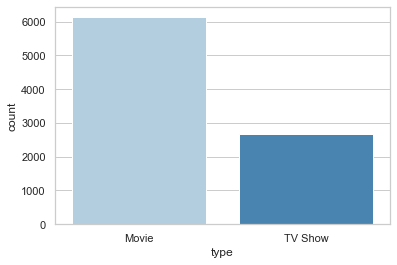

In [4]:
sns.set(style="whitegrid")
axis = sns.countplot(x="type", data = df , palette= "Blues" )

The following above shows that there are more Movies than TV Shows. Therefore, the recommendation system may be skewed towards recommending Movies to user 

## Displaying the netflix title listed_in

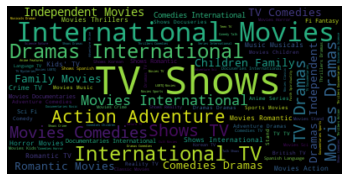

In [9]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(listedin for listedin in df["listed_in"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

From the wordcloud, TV Shows, International movies and Dramas International are the Top 3 listed_in

## Analysis of the Netflix's series' Release Year

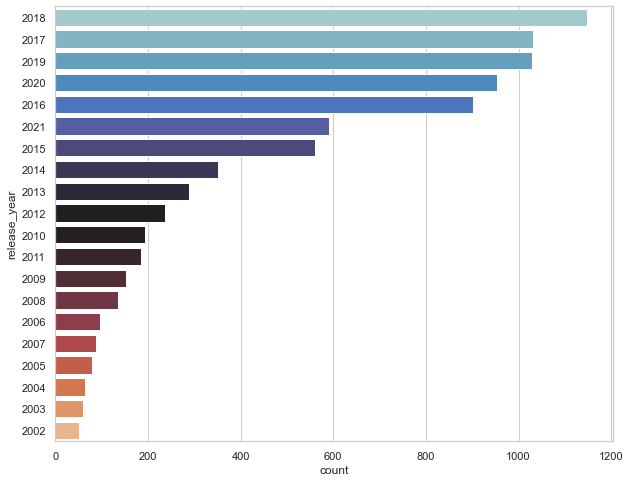

In [10]:
plt.figure(figsize = (10,8))
sns.set(style = "whitegrid")
axis = sns.countplot( y = "release_year", data = df, palette = "icefire", order = df["release_year"].value_counts().index[0:20] )

It is observed that 2018 has the most number of netflix titles being released which is followed by 2017, 2019 and 2020. <br>
Some possible reason that this was observed could be due to the Covid-19 Pandemic in 2019 which result in the decrease. 

## Preprocessing for Netflix Data

In [11]:
# convert lowercase and remove numbers, punctuations, spaces, etc.,
df['clean_plot'] = df['description'].str.lower()
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('\s+', ' ', x))
df['clean_plot']


0       as her father nears the end of his life filmma...
1       after crossing paths at a party a cape town te...
2       to protect his family from a powerful drug lor...
3       feuds flirtations and toilet talk go down amon...
4       in a city of coaching centers known to train i...
                              ...                        
8802    a political cartoonist a crime reporter and a ...
8803    while living alone in a spooky town a young gi...
8804    looking to survive in a world taken over by zo...
8805    dragged from civilian life a former superhero ...
8806    a scrappy but poor boy worms his way into a ty...
Name: clean_plot, Length: 8807, dtype: object

#### Importing Natural Language Processing Tool Kit (NLTK) for processing of sentence by splitting them into words

In [12]:
import nltk
nltk.download('punkt')

# tokenize the sentence
df['clean_plot'] = df['clean_plot'].apply(lambda x: nltk.word_tokenize(x))
df['clean_plot']

[nltk_data] Downloading package punkt to /Users/junjie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [as, her, father, nears, the, end, of, his, li...
1       [after, crossing, paths, at, a, party, a, cape...
2       [to, protect, his, family, from, a, powerful, ...
3       [feuds, flirtations, and, toilet, talk, go, do...
4       [in, a, city, of, coaching, centers, known, to...
                              ...                        
8802    [a, political, cartoonist, a, crime, reporter,...
8803    [while, living, alone, in, a, spooky, town, a,...
8804    [looking, to, survive, in, a, world, taken, ov...
8805    [dragged, from, civilian, life, a, former, sup...
8806    [a, scrappy, but, poor, boy, worms, his, way, ...
Name: clean_plot, Length: 8807, dtype: object

#### To remove stopwords which are words that do not add value to the sentence

In [13]:
import nltk
nltk.download('stopwords')

# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
plot = []
for sentence in df['clean_plot']:
    temp = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            temp.append(word)
    plot.append(temp)
plot

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junjie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['father',
  'nears',
  'end',
  'life',
  'filmmaker',
  'kirsten',
  'johnson',
  'stages',
  'death',
  'inventive',
  'comical',
  'ways',
  'help',
  'face',
  'inevitable'],
 ['crossing',
  'paths',
  'party',
  'cape',
  'town',
  'teen',
  'sets',
  'prove',
  'whether',
  'private',
  'school',
  'swimming',
  'star',
  'sister',
  'abducted',
  'birth'],
 ['protect',
  'family',
  'powerful',
  'drug',
  'lord',
  'skilled',
  'thief',
  'mehdi',
  'expert',
  'team',
  'robbers',
  'pulled',
  'violent',
  'deadly',
  'turf',
  'war'],
 ['feuds',
  'flirtations',
  'toilet',
  'talk',
  'among',
  'incarcerated',
  'women',
  'orleans',
  'justice',
  'center',
  'new',
  'orleans',
  'gritty',
  'reality',
  'series'],
 ['city',
  'coaching',
  'centers',
  'known',
  'train',
  'india',
  'finest',
  'collegiate',
  'minds',
  'earnest',
  'unexceptional',
  'student',
  'friends',
  'navigate',
  'campus',
  'life'],
 ['arrival',
  'charismatic',
  'young',
  'priest',
 

In [14]:
df['clean_plot'] = plot
df['clean_plot']

0       [father, nears, end, life, filmmaker, kirsten,...
1       [crossing, paths, party, cape, town, teen, set...
2       [protect, family, powerful, drug, lord, skille...
3       [feuds, flirtations, toilet, talk, among, inca...
4       [city, coaching, centers, known, train, india,...
                              ...                        
8802    [political, cartoonist, crime, reporter, pair,...
8803    [living, alone, spooky, town, young, girl, bef...
8804    [looking, survive, world, taken, zombies, dork...
8805    [dragged, civilian, life, former, superhero, m...
8806    [scrappy, poor, boy, worms, way, tycoon, dysfu...
Name: clean_plot, Length: 8807, dtype: object

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_plot
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[father, nears, end, life, filmmaker, kirsten,..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[crossing, paths, party, cape, town, teen, set..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[feuds, flirtations, toilet, talk, among, inca..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[city, coaching, centers, known, train, india,..."


In [16]:
#Removing NaN results
df['cast'] = df['cast'].fillna(' ')
df['director'] = df['director'].fillna(' ')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_plot
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","[father, nears, end, life, filmmaker, kirsten,..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[crossing, paths, party, cape, town, teen, set..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,s4,TV Show,Jailbirds New Orleans,,,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[feuds, flirtations, toilet, talk, among, inca..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[city, coaching, centers, known, train, india,..."


In [17]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))
df['listed_in'].head()

0                                      [Documentaries]
1    [International TV Shows,  TV Dramas,  TV Myste...
2    [Crime TV Shows,  International TV Shows,  TV ...
3                            [Docuseries,  Reality TV]
4    [International TV Shows,  Romantic TV Shows,  ...
Name: listed_in, dtype: object

In [18]:
df['cast'] = df['cast'].apply(lambda x: x.split(',')[:4])
df['cast'].head()

0                                                  [ ]
1    [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2    [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                                  [ ]
4    [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
Name: cast, dtype: object

In [19]:
df['director'] = df['director'].apply(lambda x: x.split(','))
df['director'].head()

0    [Kirsten Johnson]
1                  [ ]
2    [Julien Leclercq]
3                  [ ]
4                  [ ]
Name: director, dtype: object

In [20]:
def clean(sentence):
    temp = []
    for word in sentence:
        temp.append(word.lower().replace(' ', ''))
    return temp

In [21]:
df['listed_in'] = [clean(x) for x in df['listed_in']]
df['cast'] = [clean(x) for x in df['cast']]
df['director'] = [clean(x) for x in df['director']]

In [22]:
# combining all the columns data
#columns = ['clean_plot', 'listed_in', 'cast', 'director']
columns = ['clean_plot']

def merge_Columns(columns,dfImdb):

    list1 = []
    for i in range(len(dfImdb)):
        words = ''
        for col in columns:
            words += ' '.join(dfImdb[col][i]) + ' '
        list1.append(words)
    return list1

l = merge_Columns(columns,df)
l

['father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable ',
 'crossing paths party cape town teen sets prove whether private school swimming star sister abducted birth ',
 'protect family powerful drug lord skilled thief mehdi expert team robbers pulled violent deadly turf war ',
 'feuds flirtations toilet talk among incarcerated women orleans justice center new orleans gritty reality series ',
 'city coaching centers known train india finest collegiate minds earnest unexceptional student friends navigate campus life ',
 'arrival charismatic young priest brings glorious miracles ominous mysteries renewed religious fervor dying town desperate believe ',
 'equestria divided bright eyed hero believes earth ponies pegasi unicorns pals hoof heart determined prove ',
 'photo shoot ghana american model slips back time becomes enslaved plantation bears witness agony ancestral past ',
 'talented batch amateur bakers face week competition whippin

In [23]:
df['clean_input'] = l
df = df[['title', 'clean_input']]
df.head()

,title,clean_input
0,Dick Johnson Is Dead,father nears end life filmmaker kirsten johnso...
1,Blood & Water,crossing paths party cape town teen sets prove...
2,Ganglands,protect family powerful drug lord skilled thie...
3,Jailbirds New Orleans,feuds flirtations toilet talk among incarcerat...
4,Kota Factory,city coaching centers known train india finest...


#### Clustering Method
Used fit_transform on the training data. <br/> It calculates the mean and variance from feature and transform the features using the respective mean and variance

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['clean_input'])

#### Utilising Cosine Similarity for Features

In [25]:
# create cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.0149629  0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.02230089]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.0149629  0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.02230089 ... 0.         0.         1.        ]]


#### Utilising Euclidean Distance for Features

In [26]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(features,features)
print(euclidean_dist)

[[0.         1.41421356 1.41421356 ... 1.41421356 1.40359332 1.41421356]
 [1.41421356 0.         1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 0.         ... 1.41421356 1.41421356 1.39835554]
 ...
 [1.41421356 1.41421356 1.41421356 ... 0.         1.41421356 1.41421356]
 [1.40359332 1.41421356 1.41421356 ... 1.41421356 0.         1.41421356]
 [1.41421356 1.41421356 1.39835554 ... 1.41421356 1.41421356 0.        ]]


In [27]:
index = pd.Series(df['title'])
index.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [28]:
def recommend_netflix(title):
    movies = []
    idx = index[index == title].index[0]
    
    print('NETFLIX INDEX:')
    print(idx)
    score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    
    print('')
    print('COS SIM SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)
    
    for i in top10:
        movies.append(df['title'][i])
    return movies

In [29]:
def recommend_netflix_ed(title):
    movies = []
    idx = index[index == title].index[0]
    
    print('NETFLIX INDEX:')
    print(idx)
    score = pd.Series(euclidean_dist[idx]).sort_values(ascending=True)
    
    print('')
    print('EUCLIDEAN DISTANCE SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)
    
    for i in top10:
        movies.append(df['title'][i])
        
    return movies

#### Performance Metrics with RMSE ( Root Mean Square Error )

In [30]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(euclidean_dist, test_size=0.2)

# Function to predict ratings
def predict(data, similarity, type='item'):
    if type == 'item':
        pred = data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


#### RMSE Formula and Implementation

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

# Predict ratings on the training data with similarity score
item_prediction = predict(train_data, cosine_sim, type='item')

# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data)))


Item-based CF RMSE: 0.01691269432281625


In [51]:
recommend_netflix('BAKI')

NETFLIX INDEX:
2426

COS SIM SCORE:
2426    1.000000
519     0.203437
3804    0.157553
5841    0.156880
7410    0.151444
          ...   
3115    0.000000
3114    0.000000
3113    0.000000
3112    0.000000
8806    0.000000
Length: 8807, dtype: float64

TOP 10 RECS:
[519, 3804, 5841, 7410, 2758, 8335, 5192, 604, 3869, 421]


['I AM A KILLER',
 'The Man Who Feels No Pain',
 'Ip Man 3',
 'Martial Arts of Shaolin',
 "Through My Father's Eyes: The Ronda Rousey Story",
 'The Green Hornet',
 'The Golden Path',
 'The Life of David Gale',
 'Olympus Has Fallen',
 'Chhota Bheem: Dus Pe Dus']

In [48]:
recommend_netflix_ed('BAKI')

NETFLIX INDEX:
2426

EUCLIDEAN DISTANCE SCORE:
2426    0.000000
519     1.262191
3804    1.298035
5841    1.298553
7410    1.302732
          ...   
3398    1.414214
5550    1.414214
2170    1.414214
4977    1.414214
2635    1.414214
Length: 8807, dtype: float64

TOP 10 RECS:
[519, 3804, 5841, 7410, 2758, 8335, 5192, 604, 3869, 421]


['I AM A KILLER',
 'The Man Who Feels No Pain',
 'Ip Man 3',
 'Martial Arts of Shaolin',
 "Through My Father's Eyes: The Ronda Rousey Story",
 'The Green Hornet',
 'The Golden Path',
 'The Life of David Gale',
 'Olympus Has Fallen',
 'Chhota Bheem: Dus Pe Dus']

In [ ]:
pd.Series(cosine_sim[3]).sort_values(ascending=False)

In [47]:
recommend_netflix('Girl from Nowhere')

NETFLIX INDEX:
516

COS SIM SCORE:
516     1.000000
2963    0.199672
6383    0.114275
8409    0.106995
3322    0.106847
          ...   
3102    0.000000
3100    0.000000
3099    0.000000
3098    0.000000
8806    0.000000
Length: 8807, dtype: float64

TOP 10 RECS:
[2963, 6383, 8409, 3322, 5419, 7907, 7174, 6760, 1777, 933]


['Misfit 2',
 'Bruno and Boots: The Wizzle War',
 'The Mad Monk',
 'Liar, Liar, Vampire',
 'You Get Me',
 'Russell Madness',
 'Kay Dyache Bola',
 'FirstBorn',
 'Kaali Khuhi',
 "Hachi: A Dog's Tale"]

## Second Dataset: IMDB Top 1000

In [ ]:
dfImdb = pd.read_csv("imdb_top_1000.csv")
dfImdb.head()

In [ ]:
dfImdb["Overview"].head()

In [ ]:
dfImdb.info()

In [ ]:
len(dfImdb)

# Analysis of IMDB Movies

In [ ]:
from itertools import count
genreFreq = pd.crosstab(index = dfImdb["Genre"],columns = "Count" )
genreFreq = genreFreq.sort_values(by = "Count" , ascending= False)
genreFreq

In [ ]:
text = " ".join(Genre for Genre in dfImdb["Genre"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

From the analysis above, the largest number of Genre of movies is Drama with a count of 85. <br/> Based on the number of different movies in different genres, are we able to utilise their content to recommend similar movies of the same genre?

In [ ]:
plt.figure(figsize = (10,8))
sns.set(style = "whitegrid")
axis = sns.countplot( y = "Released_Year", data = dfImdb, palette = "icefire", order = dfImdb["Released_Year"].value_counts().index[0:20] )

It is observed that the top 3 released years are 2014, 2004 and 2009. 

## Preprocessing for IMDB Top 1000 Dataset

In [ ]:
dfImdb['clean_overview'] = dfImdb["Overview"].str.lower()
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: re.sub('\s+', ' ', x))
dfImdb['clean_overview']

In [ ]:
# tokenize the sentence
dfImdb['clean_overview'] = dfImdb['clean_overview'].apply(lambda x: nltk.word_tokenize(x))
dfImdb['clean_overview']

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
overview = []
for sentence in dfImdb['clean_overview']:
    temp = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            temp.append(word)
    overview.append(temp)
overview

In [ ]:
dfImdb['clean_overview'] = overview
dfImdb['clean_overview']

In [ ]:
dfImdb.head()

Cleaning data from "Genre", "Director", "Actors" and merging them into the "clean_overview"

In [ ]:
dfImdb['Genre'] = dfImdb['Genre'].apply(lambda x:x.split(','))
dfImdb['Director'] = dfImdb['Director'].apply(lambda x:x.split(','))
dfImdb['Actors'] = dfImdb['Star1'] + ',' + dfImdb['Star2'] + ',' + dfImdb['Star3'] + ',' + dfImdb['Star4']
dfImdb['Actors'] = dfImdb['Actors'].apply(lambda x:x.split(','))
dfImdb['Actors'].head()

In [ ]:
columns = ['clean_overview', 'Genre', 'Actors', 'Director']

list1 = merge_Columns(columns,dfImdb)
list1

In [ ]:
dfImdb['clean_data'] = list1
dfImdb = dfImdb[['Series_Title' , 'clean_data']]
dfImdb.head()

#### Clustering Method
Used fit_transform on the training data. <br/> It calculates the mean and variance from feature and transform the features using the respective mean and variance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(dfImdb['clean_data'])

#### Utilising Cosine Similarity for Features

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

#### Utilising Euclidean Distance for Features

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(features,features)
print(euclidean_dist)

From the list below of series below, the recommendation system must be able to recommend series with the closest similarity

In [ ]:
index = pd.Series(dfImdb['Series_Title'])
index.head()

In [ ]:
def movie_recommendation(series_title):
    movies = []
    idx = index[index == series_title].index[0]
    print("MOVIE INDEX:")
    print(idx)

    score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    print('')
    print('COS SIM SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)

    for i in top10:
        movies.append(dfImdb['Series_Title'][i])
    return movies

In [ ]:
def movie_recommendation_ed(series_title):
    movies = []
    idx = index[index == series_title].index[0]
    print("MOVIE INDEX:")
    print(idx)

    score = pd.Series(euclidean_dist[idx]).sort_values(ascending=True)
    print('')
    print('EUCLIDEAN DISTANCE SCORE:')
    print(score)
    top10 = list(score.iloc[1:11].index)
    
    print('')
    print('TOP 10 RECS:')
    print(top10)

    for i in top10:
        movies.append(dfImdb['Series_Title'][i])
    return movies

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(euclidean_dist, test_size=0.2)

# Function to predict ratings
def predict(data, similarity, type='item'):
    if type == 'item':
        pred = data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

# Predict ratings on the training data with similarity score
item_prediction = predict(train_data, cosine_sim, type='item')

# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data)))

In [ ]:
movie_recommendation('The Dark Knight')

In [ ]:
movie_recommendation('Avengers: Endgame')

In [ ]:
movie_recommendation_ed("Avengers: Endgame")

In [ ]:
movie_recommendation_ed('The Dark Knight')